In [1]:
from result_utils import *
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

In [2]:
# please change the entity and the project to yours
runs_df = load_wandb(entity='none', project='none')

In [3]:
seeds = [0]
target_keys = ['taskwise_acc', 'taskwise_bmr']
trainer_dict = {}
default_kwargs = {
    'dataset': 'split_cifar_100s',
    'lr': 0.001,
    'epochs' : 70,
    'bs': 256,
    'decay': 0.01,
    'continual':'task',
    'n_tasks' : 2,
    'start_task' : 0,
}
T1_skew_ratios = [0.5, 0.99]
T2_skew_ratios = [0.5]

## get CL trainer results

In [4]:
# fine-tuning
param_kwargs = {
    'trainer': 'vanilla',
    'ex_id' : 'none' # your experiment id (optional), used to distinguish different runs
}
hyperparameters = None
trainer_dict = get_trainer_result(runs_df, trainer_dict, T1_skew_ratios, T2_skew_ratios, default_kwargs, param_kwargs, target_keys, seeds, hyperparameters)

{'trainer': 'vanilla', 'ex_id': 'none', 'skew_ratio': [[0.5, 0.5]]}
# of runs : 1
{'trainer': 'vanilla', 'ex_id': 'none', 'skew_ratio': [[0.99, 0.5]]}
# of runs : 1


In [5]:
# freezing
param_kwargs = {
    'trainer': 'freezing',
    'ex_id' : 'none' # your experiment id (optional), used to distinguish different runs
}          
hyperparameters = None
trainer_dict = get_trainer_result(runs_df, trainer_dict, T1_skew_ratios, T2_skew_ratios, default_kwargs, param_kwargs, target_keys, seeds, hyperparameters)

{'trainer': 'freezing', 'ex_id': 'none', 'skew_ratio': [[0.5, 0.5]]}
# of runs : 1
{'trainer': 'freezing', 'ex_id': 'none', 'skew_ratio': [[0.99, 0.5]]}
# of runs : 1


In [6]:
seeds = [0]
lambs = [0.001, 0.01, 0.03, 0.1, 0.3, 1.0, 10.0, 30.0, 100.0]

# fine-tuning
param_kwargs = {
    'trainer': 'lwf',
    'ex_id' : 'none' # your experiment id (optional), used to distinguish different runs
}
hyperparameters = {'lamb': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 10.0, 30.0]}
trainer_dict = get_trainer_result(runs_df, trainer_dict, T1_skew_ratios, T2_skew_ratios, default_kwargs, param_kwargs, target_keys, seeds, hyperparameters)

{'trainer': 'lwf', 'ex_id': 'none', 'lamb': 0.01, 'skew_ratio': [[0.5, 0.5]]}
# of runs : 1
{'trainer': 'lwf', 'ex_id': 'none', 'lamb': 0.01, 'skew_ratio': [[0.99, 0.5]]}
# of runs : 1
{'trainer': 'lwf', 'ex_id': 'none', 'lamb': 0.03, 'skew_ratio': [[0.5, 0.5]]}
# of runs : 1
{'trainer': 'lwf', 'ex_id': 'none', 'lamb': 0.03, 'skew_ratio': [[0.99, 0.5]]}
# of runs : 1
{'trainer': 'lwf', 'ex_id': 'none', 'lamb': 0.1, 'skew_ratio': [[0.5, 0.5]]}
# of runs : 1
{'trainer': 'lwf', 'ex_id': 'none', 'lamb': 0.1, 'skew_ratio': [[0.99, 0.5]]}
# of runs : 1
{'trainer': 'lwf', 'ex_id': 'none', 'lamb': 0.3, 'skew_ratio': [[0.5, 0.5]]}
# of runs : 1
{'trainer': 'lwf', 'ex_id': 'none', 'lamb': 0.3, 'skew_ratio': [[0.99, 0.5]]}
# of runs : 1
{'trainer': 'lwf', 'ex_id': 'none', 'lamb': 1.0, 'skew_ratio': [[0.5, 0.5]]}
# of runs : 1
{'trainer': 'lwf', 'ex_id': 'none', 'lamb': 1.0, 'skew_ratio': [[0.99, 0.5]]}
# of runs : 1
{'trainer': 'lwf', 'ex_id': 'none', 'lamb': 3.0, 'skew_ratio': [[0.5, 0.5]]}
# of

## Forward

<Figure size 1300x1100 with 0 Axes>

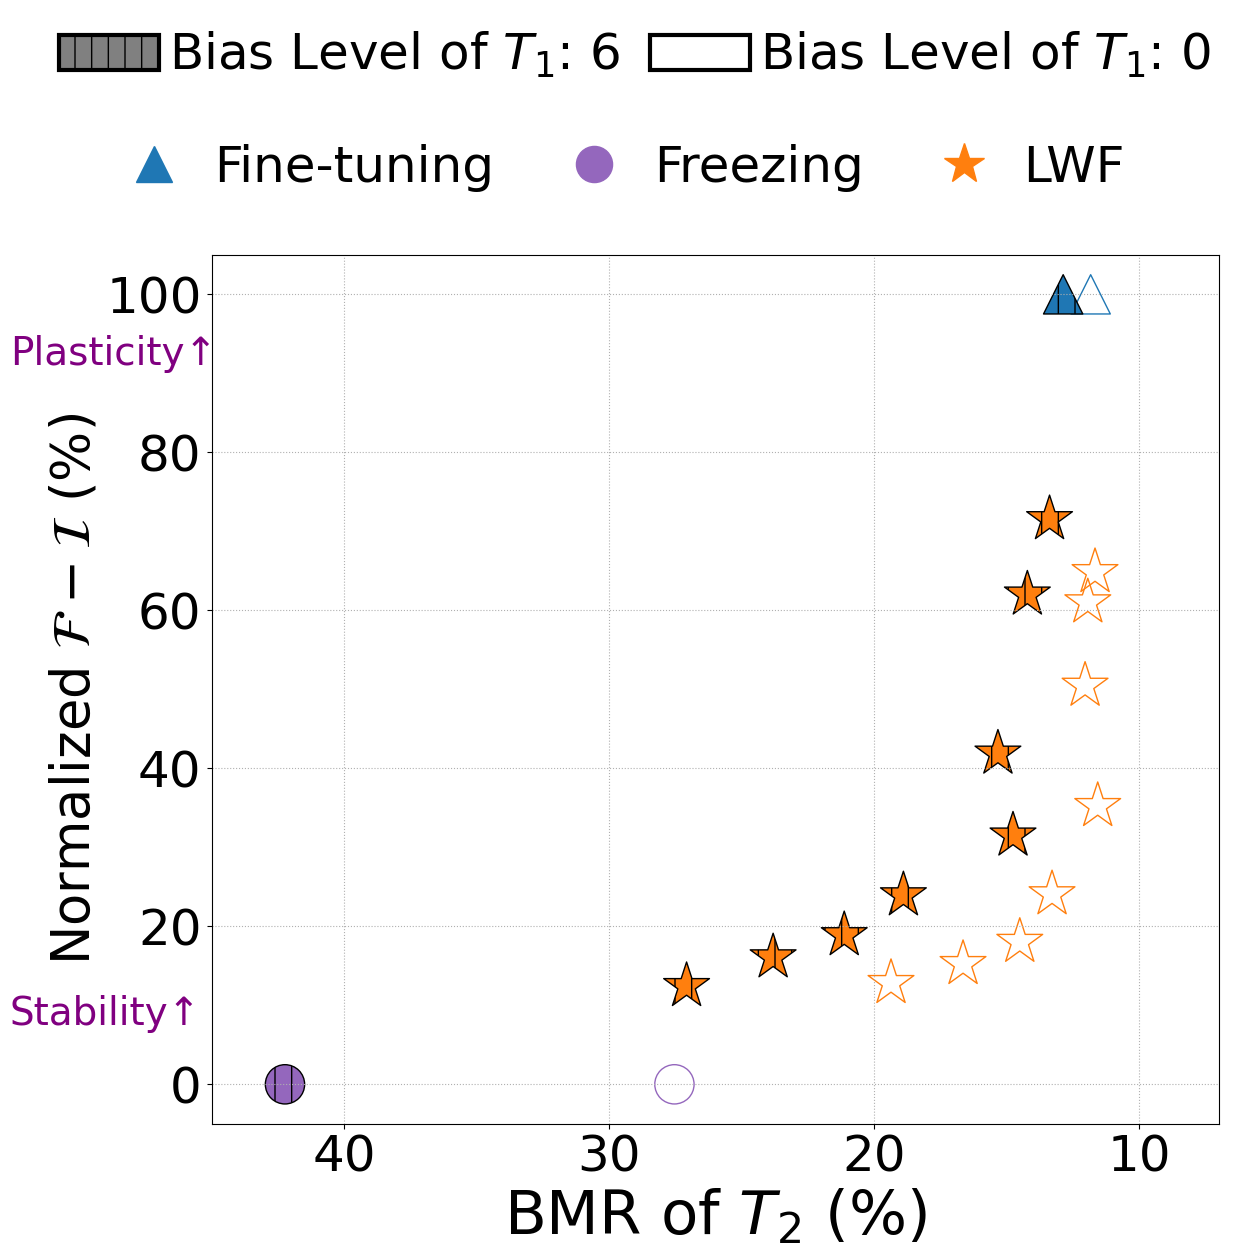

In [7]:
skew_ratio_list = [0.5, 0.6826, 0.8223, 0.9087, 0.9554, 0.9787, 0.99] # 7 bias levels on a log scale 
markersize = 26
default_font_size=34

trainer_plot_dict = {
    'vanilla': {'marker':'^', 'color':'tab:blue', 's':800},
    'freezing': {'marker':'o', 'color':'tab:purple', 's':800},
    'lwf': {'marker':'*', 'color':'tab:orange', 's':1200}
}

sr_plot_dict = {
    '0.5': {'hatch': None},
    '0.99': {'hatch': '|'}
}

lwf = Line2D([], [], color=trainer_plot_dict['lwf']['color'], marker=trainer_plot_dict['lwf']['marker'], linestyle='None',
             markersize=markersize+4, label='LWF')
vanilla = Line2D([], [], color=trainer_plot_dict['vanilla']['color'], marker=trainer_plot_dict['vanilla']['marker'], linestyle='None', 
                 markersize=markersize, label='Fine-tuning')
freezing = Line2D([], [], color=trainer_plot_dict['freezing']['color'], marker=trainer_plot_dict['freezing']['marker'], linestyle='None',
                  markersize=markersize, label='Freezing')

for t2_sr in T2_skew_ratios:
    plt.figure(figsize=(13, 11))
    fig, (ax1) = plt.subplots(1, 1, figsize=(13, 11))
    for t1_sr in T1_skew_ratios:
        for m in trainer_dict.keys():
            if t1_sr==0.5:
                sr_plot_dict[str(t1_sr)].update({'facecolor': 'None', 'edgecolor': trainer_plot_dict[m]['color']})
            else:
                sr_plot_dict[str(t1_sr)].update({'facecolor': trainer_plot_dict[m]['color'], 'edgecolor': 'black'})
            
            norm_f_i_diff, bmr = get_metric_array(m, trainer_dict, t1_sr, t2_sr)        
            trainer_plot_dict[m].update(sr_plot_dict[str(t1_sr)])
            ax1.scatter(bmr*100, norm_f_i_diff * 100, **trainer_plot_dict[m])

    # plot formatting
    ax1.set_xlim([45, 7]) 
    ax1.set_ylim((-5, 105))
    ax1.grid(True,linestyle=':')
    metric_name = 'BMR'
    ax1.set_xlabel(fr'{metric_name} of $T_2$ (%)', fontsize=default_font_size+10)
    ax1.set_ylabel(r'Normalized $\mathcal{F} - \mathcal{I}$ (%)', fontsize=default_font_size+4)
    ax1.tick_params(axis='x', labelsize=default_font_size + 2)
    ax1.tick_params(axis='y', labelsize=default_font_size + 2)
    # plt.tight_layout()

    t1_0 = Patch(facecolor='white', label=fr'Bias Level of $T_1$: {skew_ratio_list.index(T1_skew_ratios[0])}', edgecolor='black', linewidth=3)
    t1_1 = Patch(facecolor='gray', label=fr'Bias Level of $T_1$: {skew_ratio_list.index(T1_skew_ratios[1])}', hatch='|', edgecolor='black', linewidth=3)
    plt.subplots_adjust(wspace=0.13, top=0.9)
    plt.figtext(-0.03, 0.2, u'Stability\u2191', color='purple', fontsize=28)
    plt.figtext(-0.03,0.8, u'Plasticity\u2191', color='purple', fontsize=28)
    l1 = plt.legend(handles=[vanilla, freezing, lwf], fontsize=default_font_size+2, loc='center', bbox_to_anchor=(0.4, 1.1), ncol=3,  handletextpad=0.2, columnspacing=1.0, frameon=False)
    l2 = plt.legend(handles=[t1_1, t1_0], fontsize=default_font_size+2, loc='center', bbox_to_anchor=(0.42, 1.23), ncol=2,  handletextpad=0.2, columnspacing=0.6, frameon=False)
    plt.gca().add_artist(l1)